# Splitting data processing into multiple steps

Break a complex question into multiple steps and check your work along the way:

e.g. What is the average precipitation on for days with a high temperature less than 60 and a low temperature of 30 or less, for days with and without snow fall?

In [21]:
import pandas as pd
import seaborn as sns

In [6]:
weather = pd.read_csv('https://raw.githubusercontent.com/dlevine01/urban-data-analysis-course/refs/heads/main/Data/Source%20Data/weather_data_nyc_centralpark_2016.csv')

In [7]:
weather['precipitation_n'] = pd.to_numeric(weather['precipitation'],errors='coerce')
weather['snow fall_n'] = pd.to_numeric(weather['snow fall'],errors='coerce')

In [8]:
weather

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,precipitation_n,snow fall_n
0,1-1-2016,42,34,38.0,0.00,0.0,0,0.00,0.0
1,2-1-2016,40,32,36.0,0.00,0.0,0,0.00,0.0
2,3-1-2016,45,35,40.0,0.00,0.0,0,0.00,0.0
3,4-1-2016,36,14,25.0,0.00,0.0,0,0.00,0.0
4,5-1-2016,29,11,20.0,0.00,0.0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
361,27-12-2016,60,40,50.0,0,0,0,0.00,0.0
362,28-12-2016,40,34,37.0,0,0,0,0.00,0.0
363,29-12-2016,46,33,39.5,0.39,0,0,0.39,0.0
364,30-12-2016,40,33,36.5,0.01,T,0,0.01,NaN


In [9]:
days_with_high_less_than_60 = (
    weather
    [
        weather['maximum temperature'] < 60
    ]
)

In [10]:
days_with_high_less_than_60

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,precipitation_n,snow fall_n
0,1-1-2016,42,34,38.0,0.00,0.0,0,0.00,0.0
1,2-1-2016,40,32,36.0,0.00,0.0,0,0.00,0.0
2,3-1-2016,45,35,40.0,0.00,0.0,0,0.00,0.0
3,4-1-2016,36,14,25.0,0.00,0.0,0,0.00,0.0
4,5-1-2016,29,11,20.0,0.00,0.0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
360,26-12-2016,50,33,41.5,0.02,0,0,0.02,0.0
362,28-12-2016,40,34,37.0,0,0,0,0.00,0.0
363,29-12-2016,46,33,39.5,0.39,0,0,0.39,0.0
364,30-12-2016,40,33,36.5,0.01,T,0,0.01,NaN


In [11]:
len(days_with_high_less_than_60)

146

In [12]:
days_with_also_low_temperature_30_or_less = (
    days_with_high_less_than_60
    [
        days_with_high_less_than_60['minimum temperature'] <= 30
    ]
)

In [13]:
days_with_also_low_temperature_30_or_less

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,precipitation_n,snow fall_n
3,4-1-2016,36,14,25.0,0.00,0.0,0,0.00,0.0
4,5-1-2016,29,11,20.0,0.00,0.0,0,0.00,0.0
5,6-1-2016,41,25,33.0,0.00,0.0,0,0.00,0.0
10,11-1-2016,40,26,33.0,0.00,0.0,0,0.00,0.0
11,12-1-2016,44,25,34.5,0.00,T,0,0.00,NaN
12,13-1-2016,30,22,26.0,0.00,0.0,0,0.00,0.0
13,14-1-2016,38,22,30.0,0.00,T,0,0.00,NaN
16,17-1-2016,42,30,36.0,0.05,0.4,0,0.05,0.4
17,18-1-2016,31,18,24.5,T,T,T,NaN,NaN
18,19-1-2016,28,16,22.0,0.00,0.0,T,0.00,0.0


In [14]:
(
    weather
    [
        weather['snow fall_n'] > 0
    ]
)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,precipitation_n,snow fall_n
16,17-1-2016,42,30,36.0,0.05,0.4,0,0.05,0.4
21,22-1-2016,30,21,25.5,0.01,0.2,0,0.01,0.2
22,23-1-2016,27,24,25.5,2.31,27.3,6,2.31,27.3
35,5-2-2016,44,31,37.5,0.53,2.5,1,0.53,2.5
38,8-2-2016,39,28,33.5,0.05,0.1,0,0.05,0.1
45,15-2-2016,35,13,24.0,0.44,1.4,0,0.44,1.4
63,4-3-2016,39,30,34.5,0.11,0.4,T,0.11,0.4
80,21-3-2016,50,32,41.0,0.06,0.5,T,0.06,0.5
345,11-12-2016,35,28,31.5,0.03,0.4,0,0.03,0.4
351,17-12-2016,39,24,31.5,0.73,2.8,2,0.73,2.8


In [15]:
len(days_with_also_low_temperature_30_or_less)

46

In [16]:
days_in_temp_range_with_any_snow_fall_category = (
    days_with_also_low_temperature_30_or_less
    .assign(
        any_snow_fall = days_with_also_low_temperature_30_or_less['snow fall_n'] > 0
    )
)

In [17]:
days_in_temp_range_with_any_snow_fall_category.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,precipitation_n,snow fall_n,any_snow_fall
3,4-1-2016,36,14,25.0,0.00,0.0,0,0.0,0.0,False
4,5-1-2016,29,11,20.0,0.00,0.0,0,0.0,0.0,False
5,6-1-2016,41,25,33.0,0.00,0.0,0,0.0,0.0,False
10,11-1-2016,40,26,33.0,0.00,0.0,0,0.0,0.0,False
11,12-1-2016,44,25,34.5,0.00,T,0,0.0,NaN,False


In [18]:
(
    days_in_temp_range_with_any_snow_fall_category
    .groupby('any_snow_fall')
    ['precipitation_n']
    .mean()
)

any_snow_fall
False    0.017429
True     0.466250
Name: precipitation_n, dtype: float64

In [19]:
mean_precipitation_in_temp_range_by_snow_fall = (
    days_in_temp_range_with_any_snow_fall_category
    .groupby('any_snow_fall')
    ['precipitation_n']
    .mean()
    .reset_index()
)

In [20]:
mean_precipitation_in_temp_range_by_snow_fall

,any_snow_fall,precipitation_n
0,False,0.017429
1,True,0.466250


<Axes: >

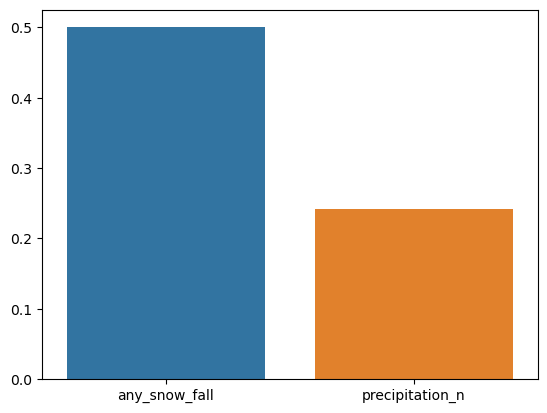

In [ ]:
sns.barplot(
    mean_precipitation_in_temp_range_by_snow_fall, 
    errorbar=None
)

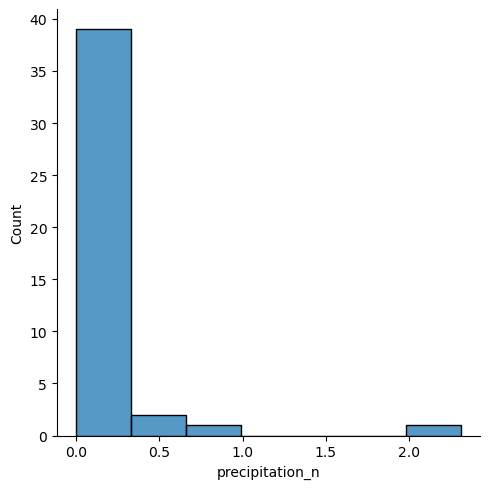

In [28]:
sns.displot(
    data=days_in_temp_range_with_any_snow_fall_category,
    x='precipitation_n',
)